In [58]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random

In [2]:
def get_data(DATADIR):
    data = []
    for category in CATEGORIES:  # do fire and no fire

        path = os.path.join(DATADIR,category)  # create path to fire and no fire
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=fire 1=no fire

        for img in tqdm(os.listdir(path)):  # iterate over each image per fire and no fire
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
    return data

In [3]:
def data_to_variables(data):
    
    random.shuffle(data)
    
    X = []
    y = []

    for features,label in data:
        X.append(features)
        y.append(label)
        
    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    y = np.array(y)
    
    return X, y

In [4]:
IMG_SIZE = 32

In [5]:
CATEGORIES = ["fire", "nofire"]

In [90]:
DATADIR_1 = r"C:\Users\GUILH\Documents\jupyter notebook\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1\Dataset\Training_and_Validation"

data_1 = get_data(DATADIR_1)

100%|████████████████████████████████████████████████████████████████████████████████| 760/760 [01:35<00:00,  7.97it/s]


In [91]:
print(len(data_1))

1520


In [92]:
X_1,y_1 = data_to_variables(data_1)

In [93]:
print(X_1.shape)

(1520, 32, 32, 3)


In [94]:
print(y_1.shape)

(1520,)


In [95]:
DATADIR_2 = r"C:\Users\GUILH\Documents\jupyter notebook\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1\Dataset\Testing"

data_2 = get_data(DATADIR_2)

100%|████████████████████████████████████████████████████████████████████████████████| 190/190 [00:23<00:00,  8.20it/s]


In [96]:
print(len(data_2))

380


In [97]:
X_2,y_2 = data_to_variables(data_2)

In [98]:
print(X_2.shape)
print(y_2.shape)

(380, 32, 32, 3)
(380,)


In [99]:
DATADIR_3 = r"C:\Users\GUILH\Documents\jupyter notebook\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1\Dataset2"

data_3 = get_data(DATADIR_3)

100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:56<00:00,  9.59it/s]


In [100]:
print(len(data_3))
X_3,y_3 = data_to_variables(data_3)
print(X_3.shape)
print(y_3.shape)

651
(651, 32, 32, 3)
(651,)


In [101]:
DATADIR_4 = r"C:\Users\GUILH\Documents\jupyter notebook\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1\Dataset3"

data_4 = get_data(DATADIR_4)

100%|████████████████████████████████████████████████████████████████████████████████| 244/244 [01:23<00:00,  2.94it/s]


In [102]:
print(len(data_4))
X_4,y_4 = data_to_variables(data_4)
print(X_4.shape)
print(y_4.shape)

998
(998, 32, 32, 3)
(998,)


In [103]:
DATADIR_5 = r"C:\Users\GUILH\Documents\jupyter notebook\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1\Dataset4"

data_5 = get_data(DATADIR_5)

100%|██████████████████████████████████████████████████████████████████████████████████| 63/63 [00:10<00:00,  5.73it/s]


In [104]:
print(len(data_5))
X_5,y_5 = data_to_variables(data_5)
print(X_5.shape)
print(y_5.shape)

64
(64, 32, 32, 3)
(64,)


In [105]:
X = np.concatenate((X_1, X_2, X_3, X_4, X_5), axis=0)
print(X.shape)
y = np.concatenate((y_1, y_2, y_3, y_4, y_5), axis=0)
print(y.shape)

(3613, 32, 32, 3)
(3613,)


In [6]:
class_names = ['fire','no_fire']
#Função para mostrar a imagem pedida junto com a sua classificação
def ShowImagewithLabel(img):
    idx = y[img]
    print("Label of image {} is: {}".format(img, class_names[idx]))
    plt.imshow(X[img]);

Label of image 259 is: fire


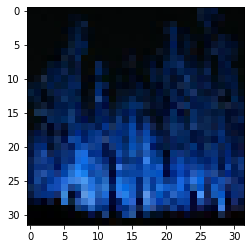

In [107]:
ShowImagewithLabel(259)

Label of image 3259 is: no_fire


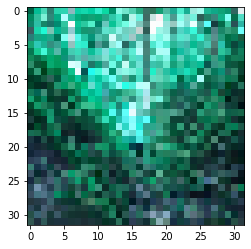

In [108]:
ShowImagewithLabel(3259)

Label of image 2259 is: no_fire


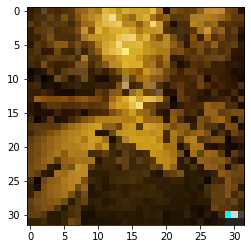

In [109]:
ShowImagewithLabel(2259)

In [110]:
print(X.min())
print(X.max())
print(X.mean())

0
255
91.65331652842167


In [111]:
VALUE = X.max()
X = X/VALUE

In [112]:
print(X.min())
print(X.max())
print(X.mean())

0.0
1.0
0.35942477069969236


In [113]:
cont_fire = 0
cont_nfire = 0
for i in range(len(y)):
    if(y[i] == 0):
        cont_fire = cont_fire + 1
    else:
        cont_nfire = cont_nfire + 1
print(cont_fire)
print(cont_nfire)

1816
1797


In [114]:
X_fire = []
X_nfire = []
for i in range(len(y)):
    if(y[i] == 0):
        X_fire.append(X[i])
    else:
        X_nfire.append(X[i])

In [115]:
print(len(X_fire))
print(len(X_nfire))

1816
1797


In [116]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [117]:
X_fire = resample(X_fire,
                  replace=True,
                  n_samples=1797,
                  random_state=123)

In [118]:
y_fire = np.zeros(len(X_fire))
y_nfire = np.ones(len(X_nfire))

In [119]:
X = []
y = []
X = np.concatenate((X_fire, X_nfire), axis=0)
y = np.concatenate((y_fire, y_nfire), axis=0)
print(len(X))
print(len(y))

3594
3594


In [7]:
#saving data
from numpy import save
save('X_fire.npy', X)
save('y_fire.npy', y)

NameError: name 'X' is not defined

In [120]:
#saving data
from numpy import save
save('X_fire_2.npy', X)
save('y_fire_2.npy', y)

In [101]:
X = []
y = []
from numpy import load
X = load('X_fire_2.npy')
y = load('y_fire_2.npy')

In [64]:
X = []
y = []
from numpy import load
X = load('X_fire.npy')
y = load('y_fire.npy')

In [102]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.20,
                                                    random_state=21)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2875, 64, 64, 3), (719, 64, 64, 3), (2875,), (719,))

In [103]:
print (X_train.min(), X_train.max())
print (X_test.min(), X_test.max())

0.0 1.0
0.0 1.0


In [12]:
LAYER_ACTIVATION = 'relu'
LAST_LAYER_ACTIVATION = 'sigmoid'
OUTPUT_LAYER_NEURONS = 1
LOSS = 'binary_crossentropy'
OPT = 'adam'

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Input, Flatten, Dense, Conv1D, MaxPooling1D, Dropout, Conv2D, MaxPool2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.models import load_model

In [69]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size = (4,4),activation='relu',input_shape = (64,64,3)))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 61, 61, 16)        784       
_________________________________________________________________
average_pooling2d_3 (Average (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)       

In [70]:
model.compile(loss=LOSS,
              optimizer=OPT,
              metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [71]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    validation_split=0.2,
                    callbacks=[early_stop])

Epoch 1/20
72/72 [==============================] - 9s 95ms/step - loss: 0.4133 - accuracy: 0.8200 - val_loss: 0.3008 - val_accuracy: 0.8887
Epoch 2/20
72/72 [==============================] - 7s 99ms/step - loss: 0.3153 - accuracy: 0.8743 - val_loss: 0.2867 - val_accuracy: 0.9009
Epoch 3/20
72/72 [==============================] - 6s 87ms/step - loss: 0.3006 - accuracy: 0.8835 - val_loss: 0.2845 - val_accuracy: 0.8991
Epoch 4/20
72/72 [==============================] - 6s 88ms/step - loss: 0.2627 - accuracy: 0.8926 - val_loss: 0.2436 - val_accuracy: 0.9148
Epoch 5/20
72/72 [==============================] - 7s 94ms/step - loss: 0.2676 - accuracy: 0.8904 - val_loss: 0.2556 - val_accuracy: 0.9043
Epoch 6/20
72/72 [==============================] - 7s 95ms/step - loss: 0.2231 - accuracy: 0.9052 - val_loss: 0.2274 - val_accuracy: 0.9096
Epoch 7/20
72/72 [==============================] - 6s 89ms/step - loss: 0.2432 - accuracy: 0.9039 - val_loss: 0.2368 - val_accuracy: 0.9113
Epoch 8/20
72

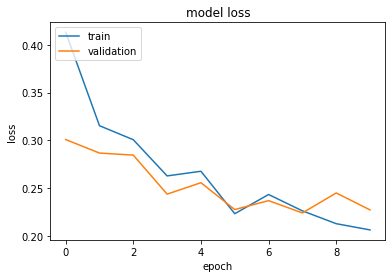

In [72]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

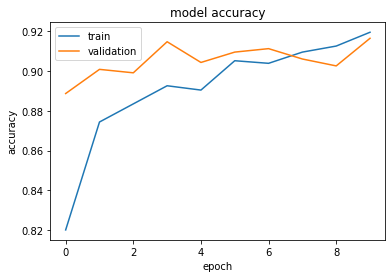

In [73]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [74]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.20884335041046143, 0.9151599407196045]


In [75]:
predictions = model.predict(X_test)
for i in range(len(predictions)-1):
    if(predictions[i] > 0.5):
        predictions[i] = 1
    else:
        predictions[i] = 0
predictions.shape

(719, 1)

In [76]:
print(y_test[3])
print(predictions[3])

1.0
[1.]


In [77]:
int(predictions[2][0])

1

In [25]:
y_test[2]

1.0

In [78]:
def PredictionChoice(img):
    realClass = int(y_test[img])
    predictedClass = int(predictions[img][0])
    realClassName = class_names[realClass]
    predictedClassName = class_names[predictedClass]
    if(realClass == predictedClass):
        print("O modelo previu corretamente a classe: {}".format(realClassName))
    else:
        print("O modelo previu a classe {}, enquanto que na verdade a classe real da imagem era: {}".format(predictedClassName,realClassName))
    plt.imshow(X_test[img]);

In [79]:
def test_vector_with_names(vector):
    lengthVector = len(vector)
    vector_with_names = vector
    for i in range(2):
        vector_with_names = np.where(vector==i, class_names[i], vector_with_names) 
    return vector_with_names

In [80]:
#Função para substituir os elementos do vetor de predições de números inteiros para as suas classes correspondentes:
def predictions_with_names(predictions):
    lengthPredictions = len(predictions)
    predictedClassName = []
    for i in range(lengthPredictions):
        predictedClass = int(predictions[i][0])
        predictedClassName.append(class_names[predictedClass])
    return predictedClassName

O modelo previu corretamente a classe: fire


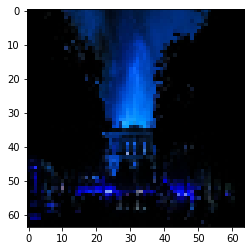

In [81]:
PredictionChoice(16)

O modelo previu corretamente a classe: no_fire


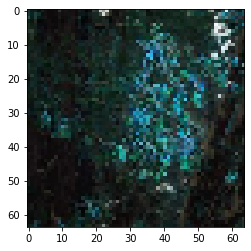

In [82]:
PredictionChoice(316)

In [83]:
y_test_with_names = test_vector_with_names(y_test)
predictionsClasses = predictions_with_names(predictions)
print(classification_report(y_test_with_names,predictionsClasses))

              precision    recall  f1-score   support

        fire       0.89      0.95      0.92       375
     no_fire       0.95      0.87      0.91       344

    accuracy                           0.91       719
   macro avg       0.92      0.91      0.91       719
weighted avg       0.92      0.91      0.91       719



In [84]:
confusion_matrix(y_test_with_names,predictionsClasses)

array([[358,  17],
       [ 45, 299]], dtype=int64)

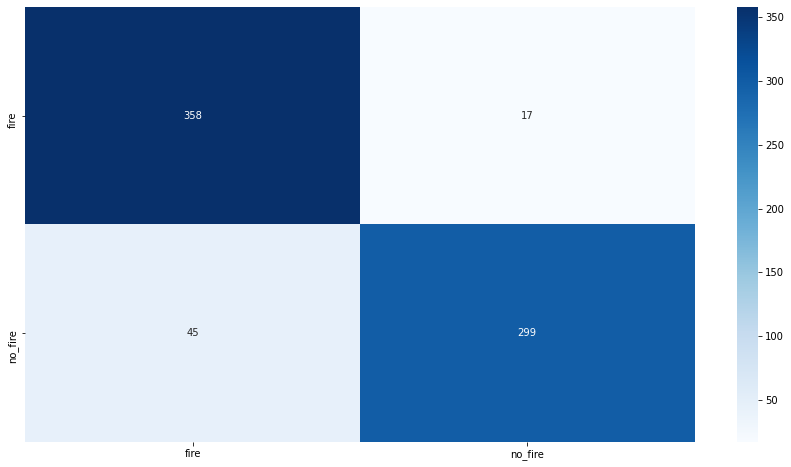

In [85]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test_with_names,predictionsClasses), cmap='Blues', annot=True, fmt='g', xticklabels = class_names, yticklabels = class_names);

In [86]:
def ExImage(nomeImagem):
    new_img_array = cv2.imread(r'C:\Users\GUILH\Pictures\{}'.format(nomeImagem))
    plt.imshow(new_img_array)
    new_img_array = cv2.resize(new_img_array, (32, 32))
    new_img_array = np.array(new_img_array).reshape(1,32,32,3)
    new_predictions = model.predict(new_img_array)
    if(new_predictions > 0.5):
        print("não fogo")
    else:
        print("fogo")   

não fogo


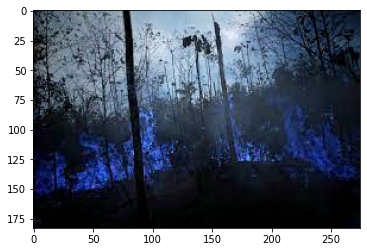

In [87]:
ExImage('fogo1.jpg')

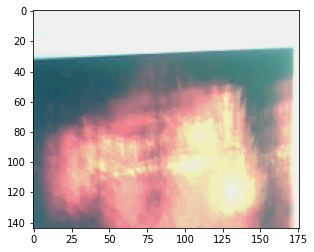

In [90]:
image = np.reshape(image,(144, 176,3)) #QCIF resolution
# Show the image
plt.imshow(image)
plt.show()

In [91]:
def ExImageOV7675(Imagem):
    plt.imshow(Imagem)
    Imagem = np.array(Imagem, dtype='uint8')
    new_img_array = cv2.resize(Imagem, (64, 64))
    new_img_array = np.array(new_img_array).reshape(1,64,64,3)
    #new_img_array = np.array(Imagem).reshape(1,32,32,3)
    new_predictions = model.predict(new_img_array)
    if(new_predictions > 0.5):
        print("não fogo")
    else:
        print("fogo")   

não fogo


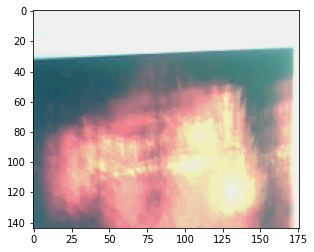

In [92]:
ExImageOV7675(image)

não fogo


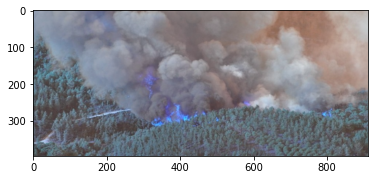

In [93]:
ExImage('fogo2.jpg')

não fogo


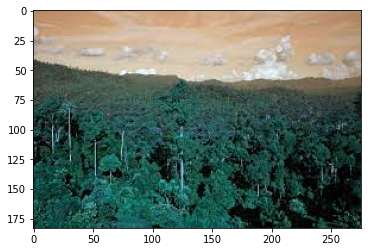

In [95]:
ExImage('nfogo1.jpg')

não fogo


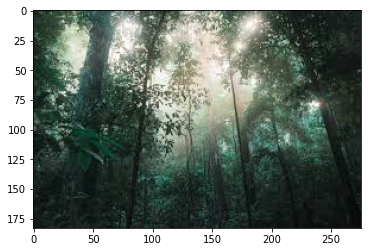

In [96]:
ExImage('nfogo2.jpg')

não fogo


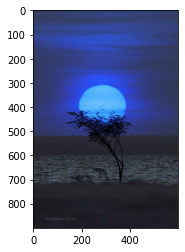

In [97]:
ExImage('nfogo3.jpg')

não fogo


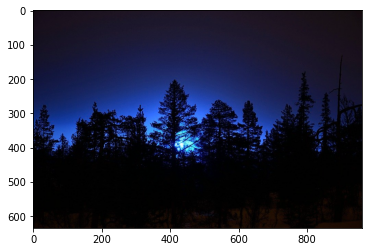

In [98]:
ExImage('nfogo4.jpg')

In [99]:
model.save('../models/fire_2d_v3.h5')
model.save('../models/fire_2d_v3')

INFO:tensorflow:Assets written to: ../models/fire_2d_v3\assets


In [100]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [101]:
datagen.fit(X_train)

In [102]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32,
             subset='training'),
             validation_data=datagen.flow(X_train, y_train,
             batch_size=8, subset='validation'),
             epochs=20, callbacks=[early_stop])

Epoch 1/20
72/72 [==============================] - 9s 122ms/step - loss: 0.4031 - accuracy: 0.8583 - val_loss: 0.2640 - val_accuracy: 0.9096
Epoch 2/20
72/72 [==============================] - 8s 118ms/step - loss: 0.2408 - accuracy: 0.9083 - val_loss: 0.2346 - val_accuracy: 0.9078
Epoch 3/20
72/72 [==============================] - 9s 120ms/step - loss: 0.2173 - accuracy: 0.9204 - val_loss: 0.1886 - val_accuracy: 0.9148
Epoch 4/20
72/72 [==============================] - 8s 117ms/step - loss: 0.2074 - accuracy: 0.9252 - val_loss: 0.1962 - val_accuracy: 0.9217
Epoch 5/20
72/72 [==============================] - 9s 119ms/step - loss: 0.1982 - accuracy: 0.9287 - val_loss: 0.1959 - val_accuracy: 0.9235


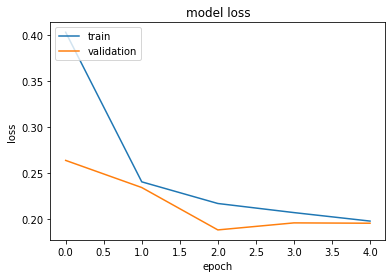

In [103]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

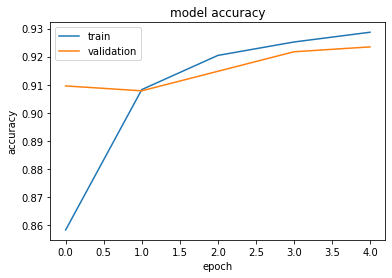

In [104]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [105]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.28231531381607056, 0.8984701037406921]


In [106]:
predictions = model.predict(X_test)
for i in range(len(predictions)-1):
    if(predictions[i] > 0.5):
        predictions[i] = 1
    else:
        predictions[i] = 0
predictions.shape

(719, 1)

O modelo previu corretamente a classe: no_fire


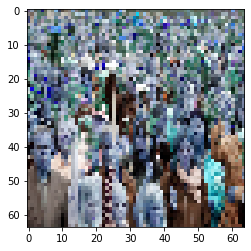

In [107]:
PredictionChoice(198)

In [108]:
y_test_with_names = test_vector_with_names(y_test)
predictionsClasses = predictions_with_names(predictions)
print(classification_report(y_test_with_names,predictionsClasses))

              precision    recall  f1-score   support

        fire       0.86      0.96      0.91       375
     no_fire       0.95      0.83      0.88       344

    accuracy                           0.90       719
   macro avg       0.91      0.89      0.90       719
weighted avg       0.90      0.90      0.90       719



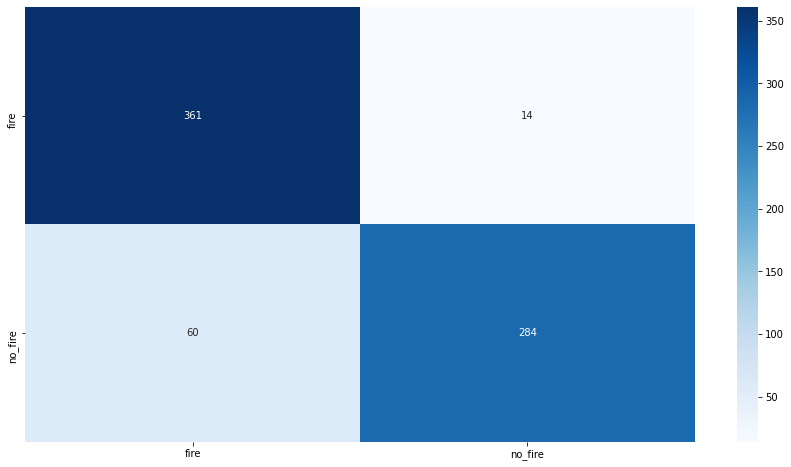

In [109]:
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test_with_names,predictionsClasses), cmap='Blues', annot=True, fmt='g', xticklabels = class_names, yticklabels = class_names);

não fogo


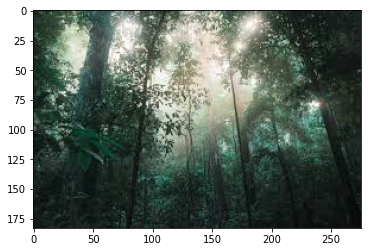

In [110]:
ExImage('nfogo2.jpg')

fogo


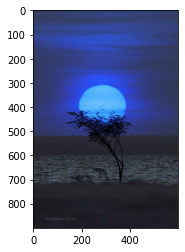

In [111]:
ExImage('nfogo3.jpg')

## CALCULATING THE SIZE OF THE MODEL

In [48]:
model.save('../models/cnn_2d_v1_fire.h5')
model.save('../models/cnn_2d_v1_fire')

INFO:tensorflow:Assets written to: ../models/cnn_2d_v1_fire\assets


In [49]:
# Convert TF model to a tflite model
model_cnn_v1_fire = load_model('../models/cnn_2d_v1_fire')
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn_v1_fire)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("../models/model_cnn_v1_fire.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpt_n2a0hu\assets


657856

In [51]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

    c_str = ''

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += '#define ' + var_name.upper() + '_H\n\n'

    # Add array length at top of file
    c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data) :

        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formatting so each line stays within 80 characters
        if (i + 1) < len(hex_data):
            hex_str += ','
        if (i + 1) % 12 == 0:
            hex_str += '\n '
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str

In [52]:
c_model_name = '../models/model_cnn_v1_fire'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

Consultando o diretório onde se salvou os arquivos otimizados, percebe-se que há um gasto de memória de 4016KB, bem superiores ao limite do arduino que é de 1MB

### Second Model

In [55]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size = (4,4),activation='relu',input_shape = (64,64,3)))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 61, 61, 16)        784       
_________________________________________________________________
average_pooling2d_9 (Average (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
average_pooling2d_10 (Averag (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)       

In [56]:
model.compile(loss=LOSS,
              optimizer=OPT,
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    validation_split=0.2,
                    callbacks=[early_stop])

Epoch 1/20
72/72 [==============================] - 7s 78ms/step - loss: 0.4704 - accuracy: 0.7991 - val_loss: 0.3419 - val_accuracy: 0.8557
Epoch 2/20
72/72 [==============================] - 6s 81ms/step - loss: 0.3333 - accuracy: 0.8670 - val_loss: 0.2913 - val_accuracy: 0.8765
Epoch 3/20
72/72 [==============================] - 6s 84ms/step - loss: 0.3089 - accuracy: 0.8791 - val_loss: 0.3011 - val_accuracy: 0.8730
Epoch 4/20
72/72 [==============================] - 5s 76ms/step - loss: 0.2912 - accuracy: 0.8765 - val_loss: 0.2673 - val_accuracy: 0.8974
Epoch 5/20
72/72 [==============================] - 5s 74ms/step - loss: 0.2638 - accuracy: 0.8948 - val_loss: 0.2432 - val_accuracy: 0.8991
Epoch 6/20
72/72 [==============================] - 5s 70ms/step - loss: 0.2580 - accuracy: 0.8952 - val_loss: 0.2463 - val_accuracy: 0.9061
Epoch 7/20
72/72 [==============================] - 5s 75ms/step - loss: 0.2418 - accuracy: 0.9000 - val_loss: 0.2408 - val_accuracy: 0.9113
Epoch 8/20
72

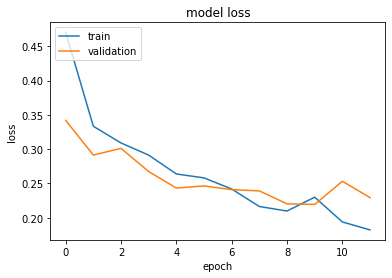

In [57]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

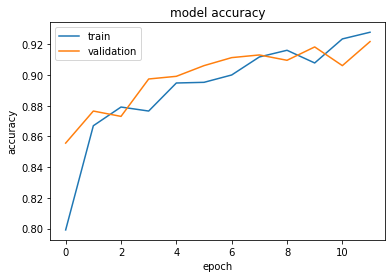

In [58]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [59]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.25802311301231384, 0.9137691259384155]


In [60]:
model.save('../models/cnn_2d_v2_fire.h5')
model.save('../models/cnn_2d_v2_fire')
# Convert TF model to a tflite model
model_cnn_v2_fire = load_model('../models/cnn_2d_v2_fire')
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn_v2_fire)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("../models/model_cnn_v2_fire.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: ../models/cnn_2d_v2_fire\assets


INFO:tensorflow:Assets written to: ../models/cnn_2d_v2_fire\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpxxnmjgru\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpxxnmjgru\assets


108496

In [61]:
c_model_name = '../models/model_cnn_v2_fire'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

Consultando o diretório onde se salvou os arquivos otimizados, percebe-se que há um gasto de memória de 663KB, um valor consideravelmente menor do que o anterior de 4016KB.

### Third Model

In [65]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size = (4,4),activation='relu',input_shape = (64,64,3)))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 61, 61, 16)        784       
_________________________________________________________________
average_pooling2d_21 (Averag (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
average_pooling2d_22 (Averag (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 16)       

In [66]:
model.compile(loss=LOSS,
              optimizer=OPT,
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    validation_split=0.2,
                    callbacks=[early_stop])

Epoch 1/20
72/72 [==============================] - 6s 71ms/step - loss: 0.4957 - accuracy: 0.7535 - val_loss: 0.3160 - val_accuracy: 0.8748
Epoch 2/20
72/72 [==============================] - 5s 68ms/step - loss: 0.3325 - accuracy: 0.8678 - val_loss: 0.2984 - val_accuracy: 0.8852
Epoch 3/20
72/72 [==============================] - 5s 68ms/step - loss: 0.3213 - accuracy: 0.8722 - val_loss: 0.3021 - val_accuracy: 0.8800
Epoch 4/20
72/72 [==============================] - 6s 77ms/step - loss: 0.2904 - accuracy: 0.8826 - val_loss: 0.2771 - val_accuracy: 0.8974
Epoch 5/20
72/72 [==============================] - 6s 81ms/step - loss: 0.2795 - accuracy: 0.8891 - val_loss: 0.3946 - val_accuracy: 0.8730
Epoch 6/20
72/72 [==============================] - 5s 76ms/step - loss: 0.2890 - accuracy: 0.8843 - val_loss: 0.2487 - val_accuracy: 0.9043
Epoch 7/20
72/72 [==============================] - 6s 87ms/step - loss: 0.2550 - accuracy: 0.8957 - val_loss: 0.2526 - val_accuracy: 0.8887
Epoch 8/20
72

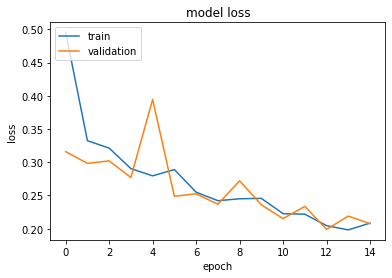

In [67]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

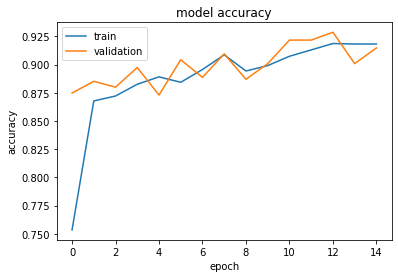

In [68]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [69]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.24539004266262054, 0.9151599407196045]


In [70]:
model.save('../models/cnn_2d_v3_fire.h5')
model.save('../models/cnn_2d_v3_fire')
# Convert TF model to a tflite model
model_cnn_v3_fire = load_model('../models/cnn_2d_v3_fire')
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn_v3_fire)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("../models/model_cnn_v3_fire.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: ../models/cnn_2d_v3_fire\assets


INFO:tensorflow:Assets written to: ../models/cnn_2d_v3_fire\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmp5eiskata\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmp5eiskata\assets


33392

In [71]:
c_model_name = '../models/model_cnn_v3_fire'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

Consultando o diretório onde se salvou os arquivos otimizados, percebe-se que há um gasto de memória de 205KB

### Fourth Model

In [75]:
model = Sequential()

model.add(Conv2D(filters=8,kernel_size = (4,4),activation='relu',input_shape = (64,64,3)))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 61, 61, 8)         392       
_________________________________________________________________
average_pooling2d_33 (Averag (None, 30, 30, 8)         0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 8)         584       
_________________________________________________________________
average_pooling2d_34 (Averag (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 12, 12, 8)       

In [76]:
model.compile(loss=LOSS,
              optimizer=OPT,
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_split=0.2,
                    callbacks=[early_stop])

Epoch 1/50
72/72 [==============================] - 4s 47ms/step - loss: 0.5863 - accuracy: 0.6817 - val_loss: 0.4352 - val_accuracy: 0.8139
Epoch 2/50
72/72 [==============================] - 3s 43ms/step - loss: 0.3747 - accuracy: 0.8500 - val_loss: 0.3543 - val_accuracy: 0.8487
Epoch 3/50
72/72 [==============================] - 3s 44ms/step - loss: 0.3236 - accuracy: 0.8691 - val_loss: 0.3233 - val_accuracy: 0.8661
Epoch 4/50
72/72 [==============================] - 3s 46ms/step - loss: 0.3195 - accuracy: 0.8739 - val_loss: 0.3286 - val_accuracy: 0.8626
Epoch 5/50
72/72 [==============================] - 3s 44ms/step - loss: 0.2901 - accuracy: 0.8917 - val_loss: 0.3553 - val_accuracy: 0.8557


In [77]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.36359331011772156, 0.852573037147522]


In [78]:
model.save('../models/cnn_2d_v4_fire.h5')
model.save('../models/cnn_2d_v4_fire')
# Convert TF model to a tflite model
model_cnn_v4_fire = load_model('../models/cnn_2d_v4_fire')
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn_v4_fire)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("../models/model_cnn_v4_fire.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: ../models/cnn_2d_v4_fire\assets


INFO:tensorflow:Assets written to: ../models/cnn_2d_v4_fire\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmphex5cq20\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmphex5cq20\assets


21856

In [79]:
c_model_name = '../models/model_cnn_v4_fire'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

Consultando o diretório onde se salvou os arquivos otimizados, percebe-se que há um gasto de memória de 134KB

### Fifth model

In [84]:
model = Sequential()

model.add(Conv2D(filters=8,kernel_size = (4,4),activation='relu',input_shape = (64,64,3)))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 61, 61, 8)         392       
_________________________________________________________________
average_pooling2d_49 (Averag (None, 30, 30, 8)         0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 28, 28, 8)         584       
_________________________________________________________________
average_pooling2d_50 (Averag (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 12, 12, 8)       

In [85]:
model.compile(loss=LOSS,
              optimizer=OPT,
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_split=0.2,
                    callbacks=[early_stop])

Epoch 1/50
72/72 [==============================] - 4s 48ms/step - loss: 0.5655 - accuracy: 0.7148 - val_loss: 0.4280 - val_accuracy: 0.7983
Epoch 2/50
72/72 [==============================] - 3s 45ms/step - loss: 0.3626 - accuracy: 0.8552 - val_loss: 0.2891 - val_accuracy: 0.8939
Epoch 3/50
72/72 [==============================] - 3s 45ms/step - loss: 0.3291 - accuracy: 0.8678 - val_loss: 0.2802 - val_accuracy: 0.8904
Epoch 4/50
72/72 [==============================] - 3s 45ms/step - loss: 0.3140 - accuracy: 0.8739 - val_loss: 0.2823 - val_accuracy: 0.8835
Epoch 5/50
72/72 [==============================] - 3s 44ms/step - loss: 0.2909 - accuracy: 0.8804 - val_loss: 0.2765 - val_accuracy: 0.8939
Epoch 6/50
72/72 [==============================] - 3s 44ms/step - loss: 0.2855 - accuracy: 0.8922 - val_loss: 0.3803 - val_accuracy: 0.8174
Epoch 7/50
72/72 [==============================] - 3s 46ms/step - loss: 0.2910 - accuracy: 0.8830 - val_loss: 0.2617 - val_accuracy: 0.9061
Epoch 8/50
72

In [86]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.22301127016544342, 0.9221140742301941]


In [87]:
model.save('../models/cnn_2d_v5_fire.h5')
model.save('../models/cnn_2d_v5_fire')
# Convert TF model to a tflite model
model_cnn_v5_fire = load_model('../models/cnn_2d_v5_fire')
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn_v5_fire)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("../models/model_cnn_v5_fire.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: ../models/cnn_2d_v5_fire\assets


INFO:tensorflow:Assets written to: ../models/cnn_2d_v5_fire\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpy6sq7r46\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpy6sq7r46\assets


20272

In [88]:
c_model_name = '../models/model_cnn_v5_fire'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

Consultando o diretório onde se salvou os arquivos otimizados, percebe-se que há um gasto de memória de 124KB

### Sixth model

In [93]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size = (4,4),activation='relu',input_shape = (64,64,3)))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 61, 61, 16)        784       
_________________________________________________________________
average_pooling2d_69 (Averag (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_89 (Dropout)         (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 28, 28, 8)         1160      
_________________________________________________________________
average_pooling2d_70 (Averag (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_90 (Dropout)         (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 12, 12, 8)       

In [94]:
model.compile(loss=LOSS,
              optimizer=OPT,
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_split=0.2,
                    callbacks=[early_stop])

Epoch 1/50
72/72 [==============================] - 7s 74ms/step - loss: 0.6137 - accuracy: 0.6435 - val_loss: 0.4324 - val_accuracy: 0.8209
Epoch 2/50
72/72 [==============================] - 5s 63ms/step - loss: 0.4040 - accuracy: 0.8352 - val_loss: 0.3678 - val_accuracy: 0.8452
Epoch 3/50
72/72 [==============================] - 4s 61ms/step - loss: 0.3369 - accuracy: 0.8670 - val_loss: 0.3339 - val_accuracy: 0.8609
Epoch 4/50
72/72 [==============================] - 4s 62ms/step - loss: 0.3106 - accuracy: 0.8761 - val_loss: 0.2914 - val_accuracy: 0.8904
Epoch 5/50
72/72 [==============================] - 4s 61ms/step - loss: 0.2982 - accuracy: 0.8865 - val_loss: 0.2765 - val_accuracy: 0.8904
Epoch 6/50
72/72 [==============================] - 5s 64ms/step - loss: 0.2864 - accuracy: 0.8896 - val_loss: 0.2698 - val_accuracy: 0.8957
Epoch 7/50
72/72 [==============================] - 5s 69ms/step - loss: 0.2786 - accuracy: 0.8909 - val_loss: 0.3623 - val_accuracy: 0.8852
Epoch 8/50
72

In [95]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.29905518889427185, 0.8915159702301025]


In [96]:
model.save('../models/cnn_2d_v6_fire.h5')
model.save('../models/cnn_2d_v6_fire')
# Convert TF model to a tflite model
model_cnn_v6_fire = load_model('../models/cnn_2d_v6_fire')
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn_v6_fire)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("../models/model_cnn_v6_fire.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: ../models/cnn_2d_v6_fire\assets


INFO:tensorflow:Assets written to: ../models/cnn_2d_v6_fire\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmp6ac7kyck\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmp6ac7kyck\assets


19600

In [97]:
c_model_name = '../models/model_cnn_v6_fire'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

Consultando o diretório onde se salvou os arquivos otimizados, percebe-se que há um gasto de memória de 120KB

### Seventh model

In [100]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size = (4,4),activation='relu',input_shape = (64,64,3)))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=4,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=4,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 61, 61, 16)        784       
_________________________________________________________________
average_pooling2d_81 (Averag (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_104 (Dropout)        (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 28, 28, 8)         1160      
_________________________________________________________________
average_pooling2d_82 (Averag (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_105 (Dropout)        (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 12, 12, 4)       

In [101]:
model.compile(loss=LOSS,
              optimizer=OPT,
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_split=0.2,
                    callbacks=[early_stop])

Epoch 1/50
72/72 [==============================] - 6s 68ms/step - loss: 0.6139 - accuracy: 0.6683 - val_loss: 0.5343 - val_accuracy: 0.8278
Epoch 2/50
72/72 [==============================] - 4s 60ms/step - loss: 0.4838 - accuracy: 0.8526 - val_loss: 0.4052 - val_accuracy: 0.8626
Epoch 3/50
72/72 [==============================] - 4s 60ms/step - loss: 0.3934 - accuracy: 0.8470 - val_loss: 0.3889 - val_accuracy: 0.8313
Epoch 4/50
72/72 [==============================] - 4s 61ms/step - loss: 0.3280 - accuracy: 0.8687 - val_loss: 0.5381 - val_accuracy: 0.8365
Epoch 5/50
72/72 [==============================] - 4s 60ms/step - loss: 0.3071 - accuracy: 0.8839 - val_loss: 0.2719 - val_accuracy: 0.8870
Epoch 6/50
72/72 [==============================] - 4s 62ms/step - loss: 0.2852 - accuracy: 0.8900 - val_loss: 0.2713 - val_accuracy: 0.8852
Epoch 7/50
72/72 [==============================] - 5s 70ms/step - loss: 0.2786 - accuracy: 0.8922 - val_loss: 0.2510 - val_accuracy: 0.8974
Epoch 8/50
72

In [102]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.2807323932647705, 0.9123783111572266]


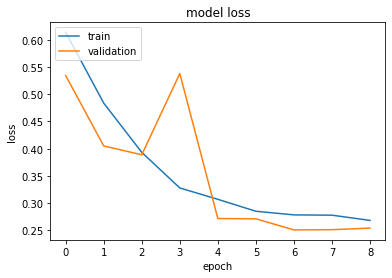

In [103]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

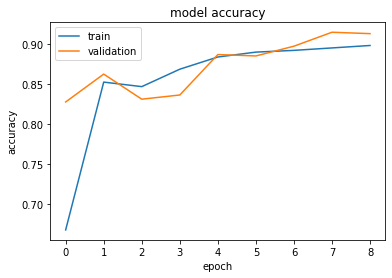

In [104]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [105]:
model.save('../models/cnn_2d_v7_fire.h5')
model.save('../models/cnn_2d_v7_fire')
# Convert TF model to a tflite model
model_cnn_v7_fire = load_model('../models/cnn_2d_v7_fire')
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn_v7_fire)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("../models/model_cnn_v7_fire.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: ../models/cnn_2d_v7_fire\assets


INFO:tensorflow:Assets written to: ../models/cnn_2d_v7_fire\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpvk3ijur5\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpvk3ijur5\assets


15600

In [106]:
c_model_name = '../models/model_cnn_v7_fire'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

Consultando o diretório onde se salvou os arquivos otimizados, percebe-se que há um gasto de memória de 96KB

### Eighth model

In [42]:
model = Sequential()

model.add(Conv2D(filters=8,kernel_size = (7,7),activation='relu',input_shape = (64,64,3)))
model.add(AveragePooling2D(pool_size=(5, 5),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=8,kernel_size=(7,7),activation='relu'))
model.add(AveragePooling2D(pool_size=(5, 5),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 58, 8)         1184      
_________________________________________________________________
average_pooling2d (AveragePo (None, 27, 27, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 27, 27, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 8)         3144      
_________________________________________________________________
average_pooling2d_1 (Average (None, 9, 9, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 648)               0

In [46]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', 
                           mode='min', 
                           verbose=1, 
                           patience=10)

In [48]:
opt = Adam(beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/30
72/72 [==============================] - 7s 83ms/step - loss: 0.2867 - accuracy: 0.8952 - val_loss: 0.2956 - val_accuracy: 0.8852
Epoch 2/30
72/72 [==============================] - 6s 80ms/step - loss: 0.2479 - accuracy: 0.9026 - val_loss: 0.2372 - val_accuracy: 0.9217
Epoch 3/30
72/72 [==============================] - 7s 98ms/step - loss: 0.2446 - accuracy: 0.9048 - val_loss: 0.2306 - val_accuracy: 0.9235
Epoch 4/30
72/72 [==============================] - 7s 99ms/step - loss: 0.2361 - accuracy: 0.9061 - val_loss: 0.2670 - val_accuracy: 0.8887
Epoch 5/30
72/72 [==============================] - 6s 87ms/step - loss: 0.2362 - accuracy: 0.9083 - val_loss: 0.2631 - val_accuracy: 0.8991
Epoch 6/30
72/72 [==============================] - 6s 87ms/step - loss: 0.2209 - accuracy: 0.9104 - val_loss: 0.2361 - val_accuracy: 0.9200
Epoch 7/30
72/72 [==============================] - 6s 86ms/step - loss: 0.2182 - accuracy: 0.9143 - val_loss: 0.2532 - val_accuracy: 0.9026
Epoch 8/30
72

In [49]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.2211301326751709, 0.9235048890113831]


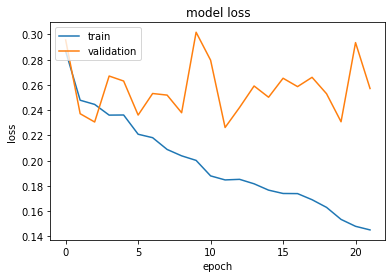

In [50]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [51]:
model.save('../models/cnn_2d_v8_fire.h5')
model.save('../models/cnn_2d_v8_fire')
# Convert TF model to a tflite model
model_cnn_v8_fire = load_model('../models/cnn_2d_v8_fire')
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn_v8_fire)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("../models/model_cnn_v8_fire.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: ../models/cnn_2d_v8_fire\assets
INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpxqse7rhp\assets


50256

In [53]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

    c_str = ''

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += '#define ' + var_name.upper() + '_H\n\n'

    # Add array length at top of file
    c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data) :

        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formatting so each line stays within 80 characters
        if (i + 1) < len(hex_data):
            hex_str += ','
        if (i + 1) % 12 == 0:
            hex_str += '\n '
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str

In [54]:
c_model_name = '../models/model_cnn_v8_fire'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

In [63]:
from tensorflow.keras.layers import MaxPooling2D
def group_layer(model):
    model.add(
        Conv1D(8,
               kernel_size=5,
               strides=1,
               padding='same',
               activation='relu'))
    model.add(
        Conv1D(8,
               kernel_size=5,
               strides=1,
               padding='same',
               activation='relu'))
    model.add(MaxPooling2D(pool_size=5, strides=2))
    return model

In [64]:
model = Sequential()
model.add(Input(shape=(64,64,3))) 
model=group_layer(model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 64, 64, 8)         128       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 64, 64, 8)         328       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 30, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 28804     
_________________________________________________________________
dropout_8 (Dropout)          (None, 4)                

In [65]:
opt = Adam(beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/30
72/72 [==============================] - 8s 78ms/step - loss: 0.5307 - accuracy: 0.6843 - val_loss: 0.3834 - val_accuracy: 0.8609
Epoch 2/30
72/72 [==============================] - 5s 72ms/step - loss: 0.3966 - accuracy: 0.7896 - val_loss: 0.3196 - val_accuracy: 0.8661
Epoch 3/30
72/72 [==============================] - 5s 64ms/step - loss: 0.3720 - accuracy: 0.8030 - val_loss: 0.3323 - val_accuracy: 0.8887
Epoch 4/30
72/72 [==============================] - 5s 68ms/step - loss: 0.3488 - accuracy: 0.8187 - val_loss: 0.2753 - val_accuracy: 0.8939
Epoch 5/30
72/72 [==============================] - 5s 74ms/step - loss: 0.3432 - accuracy: 0.8200 - val_loss: 0.2703 - val_accuracy: 0.9043
Epoch 6/30
72/72 [==============================] - 5s 69ms/step - loss: 0.3298 - accuracy: 0.8187 - val_loss: 0.2569 - val_accuracy: 0.9078
Epoch 7/30
72/72 [==============================] - 5s 73ms/step - loss: 0.3207 - accuracy: 0.8226 - val_loss: 0.2522 - val_accuracy: 0.9096
Epoch 8/30
72

In [66]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.20436395704746246, 0.9318497776985168]


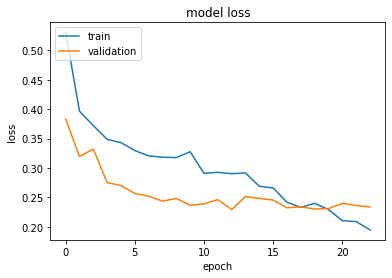

In [67]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [68]:
model.save('../models/cnn_2d_v9_fire.h5')
model.save('../models/cnn_2d_v9_fire')
# Convert TF model to a tflite model
model_cnn_v9_fire = load_model('../models/cnn_2d_v9_fire')
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn_v9_fire)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("../models/model_cnn_v9_fire.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: ../models/cnn_2d_v9_fire\assets


INFO:tensorflow:Assets written to: ../models/cnn_2d_v9_fire\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpz0f28i2k\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpz0f28i2k\assets


38336

In [69]:
c_model_name = '../models/model_cnn_v9_fire'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

### Tenth model

In [71]:
model = Sequential()
model.add(Input(shape=(64,64,3))) 
model=group_layer(model)
model.add(Dropout(0.2))
model=group_layer(model)
model.add(Dropout(0.2))
model=group_layer(model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 64, 64, 8)         128       
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 64, 64, 8)         328       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 30, 8)         0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 30, 30, 8)         328       
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 30, 30, 8)         328       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 8)        

In [72]:
opt = Adam(beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/30
72/72 [==============================] - 8s 94ms/step - loss: 0.5938 - accuracy: 0.6574 - val_loss: 0.5615 - val_accuracy: 0.8243
Epoch 2/30
72/72 [==============================] - 6s 89ms/step - loss: 0.4275 - accuracy: 0.8426 - val_loss: 0.3584 - val_accuracy: 0.8852
Epoch 3/30
72/72 [==============================] - 6s 83ms/step - loss: 0.3378 - accuracy: 0.8817 - val_loss: 0.3098 - val_accuracy: 0.8957
Epoch 4/30
72/72 [==============================] - 6s 81ms/step - loss: 0.3209 - accuracy: 0.8848 - val_loss: 0.3270 - val_accuracy: 0.8852
Epoch 5/30
72/72 [==============================] - 6s 81ms/step - loss: 0.3211 - accuracy: 0.8809 - val_loss: 0.3095 - val_accuracy: 0.8922
Epoch 6/30
72/72 [==============================] - 6s 81ms/step - loss: 0.2981 - accuracy: 0.8948 - val_loss: 0.2948 - val_accuracy: 0.8922
Epoch 7/30
72/72 [==============================] - 7s 100ms/step - loss: 0.2865 - accuracy: 0.9022 - val_loss: 0.2878 - val_accuracy: 0.9026
Epoch 8/30
7

In [73]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.2171243131160736, 0.9151599407196045]


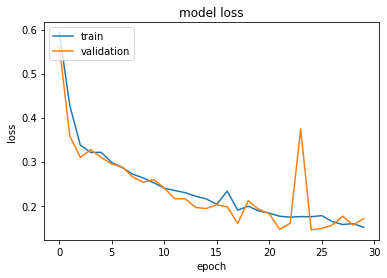

In [74]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [75]:
model.save('../models/cnn_2d_v10_fire.h5')
model.save('../models/cnn_2d_v10_fire')
# Convert TF model to a tflite model
model_cnn_v10_fire = load_model('../models/cnn_2d_v10_fire')
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn_v10_fire)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("../models/model_cnn_v10_fire.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: ../models/cnn_2d_v10_fire\assets


INFO:tensorflow:Assets written to: ../models/cnn_2d_v10_fire\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpx3fw1aih\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpx3fw1aih\assets


26432

In [76]:
c_model_name = '../models/model_cnn_v10_fire'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

### Eleventh model

In [86]:
model = Sequential()
model.add(Input(shape=(64,64,3))) 
model=group_layer(model)
model.add(Dropout(0.2))
model=group_layer(model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_38 (Conv1D)           (None, 64, 64, 8)         128       
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 64, 64, 8)         328       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 8)         0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 30, 30, 8)         0         
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 30, 30, 8)         328       
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 30, 30, 8)         328       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 8)       

In [80]:
opt = Adam(beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/30
72/72 [==============================] - 7s 88ms/step - loss: 0.5505 - accuracy: 0.6913 - val_loss: 0.3757 - val_accuracy: 0.8678
Epoch 2/30
72/72 [==============================] - 6s 88ms/step - loss: 0.3867 - accuracy: 0.7861 - val_loss: 0.3301 - val_accuracy: 0.8887
Epoch 3/30
72/72 [==============================] - 7s 96ms/step - loss: 0.3545 - accuracy: 0.8304 - val_loss: 0.3014 - val_accuracy: 0.9009
Epoch 4/30
72/72 [==============================] - 7s 94ms/step - loss: 0.3432 - accuracy: 0.8557 - val_loss: 0.2754 - val_accuracy: 0.9043
Epoch 5/30
72/72 [==============================] - 7s 100ms/step - loss: 0.3199 - accuracy: 0.8722 - val_loss: 0.2656 - val_accuracy: 0.8939
Epoch 6/30
72/72 [==============================] - 7s 90ms/step - loss: 0.3350 - accuracy: 0.8678 - val_loss: 0.2576 - val_accuracy: 0.9061
Epoch 7/30
72/72 [==============================] - 7s 92ms/step - loss: 0.3184 - accuracy: 0.8800 - val_loss: 0.2622 - val_accuracy: 0.9061
Epoch 8/30
7

In [81]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.1841883361339569, 0.9318497776985168]


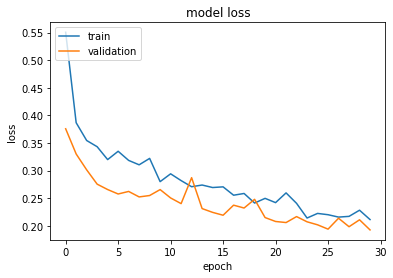

In [82]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [83]:
model.save('../models/cnn_2d_v11_fire.h5')
model.save('../models/cnn_2d_v11_fire')
# Convert TF model to a tflite model
model_cnn_v11_fire = load_model('../models/cnn_2d_v11_fire')
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn_v11_fire)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("../models/model_cnn_v11_fire.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: ../models/cnn_2d_v11_fire\assets


INFO:tensorflow:Assets written to: ../models/cnn_2d_v11_fire\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmp706pq2h6\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmp706pq2h6\assets


22704

In [84]:
c_model_name = '../models/model_cnn_v11_fire'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

### Twelfth model

In [127]:
model = Sequential()
model.add(Input(shape=(32,32,3))) 
model=group_layer(model)
model.add(Dropout(0.2))
model=group_layer(model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           (None, 32, 32, 8)         128       
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 32, 32, 8)         328       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 14, 14, 8)         0         
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 14, 14, 8)         328       
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 14, 14, 8)         328       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 8)         

In [128]:
opt = Adam(beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/30
72/72 [==============================] - 4s 30ms/step - loss: 0.6462 - accuracy: 0.6109 - val_loss: 0.5421 - val_accuracy: 0.8226
Epoch 2/30
72/72 [==============================] - 2s 26ms/step - loss: 0.5216 - accuracy: 0.8365 - val_loss: 0.4465 - val_accuracy: 0.8487
Epoch 3/30
72/72 [==============================] - 2s 28ms/step - loss: 0.4052 - accuracy: 0.8430 - val_loss: 0.3734 - val_accuracy: 0.8452
Epoch 4/30
72/72 [==============================] - 2s 26ms/step - loss: 0.3683 - accuracy: 0.8609 - val_loss: 0.3521 - val_accuracy: 0.8487
Epoch 5/30
72/72 [==============================] - 2s 26ms/step - loss: 0.3701 - accuracy: 0.8713 - val_loss: 0.3689 - val_accuracy: 0.8365
Epoch 6/30
72/72 [==============================] - 2s 24ms/step - loss: 0.3473 - accuracy: 0.8800 - val_loss: 0.3096 - val_accuracy: 0.8939
Epoch 7/30
72/72 [==============================] - 2s 26ms/step - loss: 0.3386 - accuracy: 0.8826 - val_loss: 0.2989 - val_accuracy: 0.8957
Epoch 8/30
72

In [129]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.21795372664928436, 0.9318497776985168]


In [130]:
model.save('../models/cnn_2d_v12_fire.h5')
model.save('../models/cnn_2d_v12_fire')
# Convert TF model to a tflite model
model_cnn_v12_fire = load_model('../models/cnn_2d_v12_fire')
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn_v12_fire)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("../models/model_cnn_v12_fire.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: ../models/cnn_2d_v12_fire\assets


INFO:tensorflow:Assets written to: ../models/cnn_2d_v12_fire\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpiwqbyn3f\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpiwqbyn3f\assets


20448

In [131]:
c_model_name = '../models/model_cnn_v12_fire'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

### Thirteenth model

In [132]:
model = Sequential()
model.add(Input(shape=(32,32,3))) 
model=group_layer(model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_50 (Conv1D)           (None, 32, 32, 8)         128       
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 32, 32, 8)         328       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 6276      
_________________________________________________________________
dropout_39 (Dropout)         (None, 4)               

In [134]:
opt = Adam(beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/100
72/72 [==============================] - 3s 25ms/step - loss: 0.2832 - accuracy: 0.9087 - val_loss: 0.2717 - val_accuracy: 0.9078
Epoch 2/100
72/72 [==============================] - 1s 19ms/step - loss: 0.2761 - accuracy: 0.9157 - val_loss: 0.2693 - val_accuracy: 0.9113
Epoch 3/100
72/72 [==============================] - 1s 19ms/step - loss: 0.2731 - accuracy: 0.9170 - val_loss: 0.2679 - val_accuracy: 0.9130
Epoch 4/100
72/72 [==============================] - 1s 19ms/step - loss: 0.2624 - accuracy: 0.9174 - val_loss: 0.2650 - val_accuracy: 0.9096
Epoch 5/100
72/72 [==============================] - 1s 19ms/step - loss: 0.2672 - accuracy: 0.9174 - val_loss: 0.2619 - val_accuracy: 0.9043
Epoch 6/100
72/72 [==============================] - 1s 19ms/step - loss: 0.2611 - accuracy: 0.9165 - val_loss: 0.2638 - val_accuracy: 0.9043
Epoch 7/100
72/72 [==============================] - 2s 24ms/step - loss: 0.2554 - accuracy: 0.9217 - val_loss: 0.2602 - val_accuracy: 0.9096
Epoch 

In [135]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.26043829321861267, 0.9082058668136597]


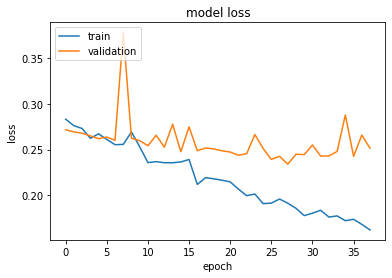

In [138]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [136]:
model.save('../models/cnn_2d_v13_fire.h5')
model.save('../models/cnn_2d_v13_fire')
# Convert TF model to a tflite model
model_cnn_v13_fire = load_model('../models/cnn_2d_v13_fire')
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn_v13_fire)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("../models/model_cnn_v13_fire.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: ../models/cnn_2d_v13_fire\assets


INFO:tensorflow:Assets written to: ../models/cnn_2d_v13_fire\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpkmy1pm8s\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpkmy1pm8s\assets


15936

In [137]:
c_model_name = '../models/model_cnn_v13_fire'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

### fourteenth model

In [142]:
model = Sequential()
model.add(Input(shape=(32,32,3))) 
model=group_layer(model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_58 (Conv1D)           (None, 32, 32, 8)         128       
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 32, 32, 8)         328       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 3138      
_________________________________________________________________
dropout_46 (Dropout)         (None, 2)               

In [143]:
opt = Adam(beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/100
72/72 [==============================] - 3s 26ms/step - loss: 0.5936 - accuracy: 0.7200 - val_loss: 0.5154 - val_accuracy: 0.8470
Epoch 2/100
72/72 [==============================] - 2s 23ms/step - loss: 0.5009 - accuracy: 0.8422 - val_loss: 0.5830 - val_accuracy: 0.8139
Epoch 3/100
72/72 [==============================] - 1s 21ms/step - loss: 0.4821 - accuracy: 0.8443 - val_loss: 0.4627 - val_accuracy: 0.8887
Epoch 4/100
72/72 [==============================] - 2s 22ms/step - loss: 0.4539 - accuracy: 0.8630 - val_loss: 0.4306 - val_accuracy: 0.8957
Epoch 5/100
72/72 [==============================] - 2s 22ms/step - loss: 0.4370 - accuracy: 0.8704 - val_loss: 0.4198 - val_accuracy: 0.8730
Epoch 6/100
72/72 [==============================] - 1s 20ms/step - loss: 0.4247 - accuracy: 0.8726 - val_loss: 0.4149 - val_accuracy: 0.8765
Epoch 7/100
72/72 [==============================] - 2s 24ms/step - loss: 0.4080 - accuracy: 0.8743 - val_loss: 0.3917 - val_accuracy: 0.8835
Epoch 

In [144]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.24607740342617035, 0.9207231998443604]


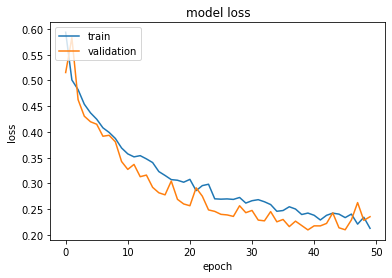

In [145]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [146]:
model.save('../models/cnn_2d_v14_fire.h5')
model.save('../models/cnn_2d_v14_fire')
# Convert TF model to a tflite model
model_cnn_v14_fire = load_model('../models/cnn_2d_v14_fire')
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn_v14_fire)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("../models/model_cnn_v14_fire.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: ../models/cnn_2d_v14_fire\assets


INFO:tensorflow:Assets written to: ../models/cnn_2d_v14_fire\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpntyuf5qo\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpntyuf5qo\assets


12800

In [147]:
c_model_name = '../models/model_cnn_v14_fire'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

## Testing with 16x16x3 images

In [148]:
IMG_SIZE = 16

In [149]:
DATADIR_1 = r"C:\Users\GUILH\Documents\jupyter notebook\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1\Dataset\Training_and_Validation"

data_1 = get_data(DATADIR_1)
X_1,y_1 = data_to_variables(data_1)

100%|████████████████████████████████████████████████████████████████████████████████| 760/760 [00:27<00:00, 27.99it/s]


In [150]:
DATADIR_2 = r"C:\Users\GUILH\Documents\jupyter notebook\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1\Dataset\Testing"

data_2 = get_data(DATADIR_2)
X_2,y_2 = data_to_variables(data_2)

100%|████████████████████████████████████████████████████████████████████████████████| 190/190 [00:05<00:00, 33.29it/s]


In [151]:
DATADIR_3 = r"C:\Users\GUILH\Documents\jupyter notebook\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1\Dataset2"

data_3 = get_data(DATADIR_3)
X_3,y_3 = data_to_variables(data_3)

100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:35<00:00, 15.20it/s]


In [152]:
DATADIR_4 = r"C:\Users\GUILH\Documents\jupyter notebook\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1\Dataset3"

data_4 = get_data(DATADIR_4)
X_4,y_4 = data_to_variables(data_4)

100%|████████████████████████████████████████████████████████████████████████████████| 244/244 [00:28<00:00,  8.61it/s]


In [153]:
DATADIR_5 = r"C:\Users\GUILH\Documents\jupyter notebook\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1\Dataset4"

data_5 = get_data(DATADIR_5)
X_5,y_5 = data_to_variables(data_5)

100%|██████████████████████████████████████████████████████████████████████████████████| 63/63 [00:07<00:00,  8.69it/s]


In [154]:
X = np.concatenate((X_1, X_2, X_3, X_4, X_5), axis=0)
print(X.shape)
y = np.concatenate((y_1, y_2, y_3, y_4, y_5), axis=0)
print(y.shape)

VALUE = X.max()
X = X/VALUE

X_fire = []
X_nfire = []
for i in range(len(y)):
    if(y[i] == 0):
        X_fire.append(X[i])
    else:
        X_nfire.append(X[i])

X_fire = resample(X_fire,
                  replace=True,
                  n_samples=1797,
                  random_state=123)

X = []
y = []
X = np.concatenate((X_fire, X_nfire), axis=0)
y = np.concatenate((y_fire, y_nfire), axis=0)
print(len(X))
print(len(y))

#saving data
from numpy import save
save('X_fire_3.npy', X)
save('y_fire_3.npy', y)

X = []
y = []
from numpy import load
X = load('X_fire_3.npy')
y = load('y_fire_3.npy')

(3613, 16, 16, 3)
(3613,)
3594
3594


In [158]:
model = Sequential()
model.add(Input(shape=(16,16,3))) 
model=group_layer(model)
model.add(Dropout(0.2))
model=group_layer(model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_60 (Conv1D)           (None, 16, 16, 8)         128       
_________________________________________________________________
conv1d_61 (Conv1D)           (None, 16, 16, 8)         328       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 8)           0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 6, 6, 8)           0         
_________________________________________________________________
conv1d_62 (Conv1D)           (None, 6, 6, 8)           328       
_________________________________________________________________
conv1d_63 (Conv1D)           (None, 6, 6, 8)           328       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 1, 1, 8)         

In [159]:
opt = Adam(beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/100
72/72 [==============================] - 2s 13ms/step - loss: 0.6697 - accuracy: 0.6096 - val_loss: 0.6016 - val_accuracy: 0.8243
Epoch 2/100
72/72 [==============================] - 1s 9ms/step - loss: 0.5323 - accuracy: 0.7852 - val_loss: 0.4525 - val_accuracy: 0.8174
Epoch 3/100
72/72 [==============================] - 1s 10ms/step - loss: 0.4668 - accuracy: 0.8104 - val_loss: 0.4208 - val_accuracy: 0.8470
Epoch 4/100
72/72 [==============================] - 1s 9ms/step - loss: 0.4404 - accuracy: 0.8274 - val_loss: 0.3995 - val_accuracy: 0.8470
Epoch 5/100
72/72 [==============================] - 1s 10ms/step - loss: 0.4235 - accuracy: 0.8417 - val_loss: 0.3632 - val_accuracy: 0.8678
Epoch 6/100
72/72 [==============================] - 1s 11ms/step - loss: 0.4124 - accuracy: 0.8500 - val_loss: 0.3560 - val_accuracy: 0.8713
Epoch 7/100
72/72 [==============================] - 1s 10ms/step - loss: 0.3690 - accuracy: 0.8722 - val_loss: 0.3365 - val_accuracy: 0.8765
Epoch 8/

In [160]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.24028295278549194, 0.9151599407196045]


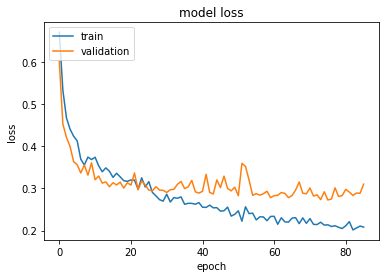

In [161]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [162]:
model.save('../models/cnn_2d_v15_fire.h5')
model.save('../models/cnn_2d_v15_fire')
# Convert TF model to a tflite model
model_cnn_v15_fire = load_model('../models/cnn_2d_v15_fire')
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn_v15_fire)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("../models/model_cnn_v15_fire.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: ../models/cnn_2d_v15_fire\assets


INFO:tensorflow:Assets written to: ../models/cnn_2d_v15_fire\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpboltdw02\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpboltdw02\assets


17376

In [163]:
c_model_name = '../models/model_cnn_v15_fire'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

In [164]:
model = Sequential()
model.add(Input(shape=(16,16,3))) 
model=group_layer(model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_64 (Conv1D)           (None, 16, 16, 8)         128       
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 16, 16, 8)         328       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 6, 6, 8)           0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 6, 6, 8)           0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 288)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 4)                 1156      
_________________________________________________________________
dropout_51 (Dropout)         (None, 4)               

In [165]:
opt = Adam(beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/100
72/72 [==============================] - 2s 12ms/step - loss: 0.6847 - accuracy: 0.5652 - val_loss: 0.6418 - val_accuracy: 0.7774
Epoch 2/100
72/72 [==============================] - 1s 8ms/step - loss: 0.5866 - accuracy: 0.7348 - val_loss: 0.5405 - val_accuracy: 0.8139
Epoch 3/100
72/72 [==============================] - 1s 8ms/step - loss: 0.5243 - accuracy: 0.8339 - val_loss: 0.5314 - val_accuracy: 0.7913
Epoch 4/100
72/72 [==============================] - 1s 8ms/step - loss: 0.4977 - accuracy: 0.8591 - val_loss: 0.4974 - val_accuracy: 0.8435
Epoch 5/100
72/72 [==============================] - 1s 9ms/step - loss: 0.4851 - accuracy: 0.8652 - val_loss: 0.4923 - val_accuracy: 0.8313
Epoch 6/100
72/72 [==============================] - 1s 8ms/step - loss: 0.4679 - accuracy: 0.8643 - val_loss: 0.4774 - val_accuracy: 0.8452
Epoch 7/100
72/72 [==============================] - 1s 8ms/step - loss: 0.4529 - accuracy: 0.8626 - val_loss: 0.4775 - val_accuracy: 0.8243
Epoch 8/100


In [166]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.2700858414173126, 0.8984701037406921]


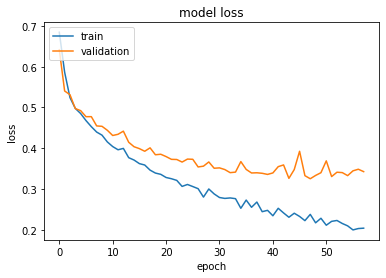

In [167]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [168]:
model.save('../models/cnn_2d_v16_fire.h5')
model.save('../models/cnn_2d_v16_fire')
# Convert TF model to a tflite model
model_cnn_v16_fire = load_model('../models/cnn_2d_v16_fire')
converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn_v16_fire)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("../models/model_cnn_v16_fire.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: ../models/cnn_2d_v16_fire\assets


INFO:tensorflow:Assets written to: ../models/cnn_2d_v16_fire\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpa9374npp\assets


INFO:tensorflow:Assets written to: C:\Users\GUILH\AppData\Local\Temp\tmpa9374npp\assets


10816

In [169]:
c_model_name = '../models/model_cnn_v16_fire'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))